In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import griddata

In [79]:
# So for the plot x-axis is input width, y-axis is normalized bump amplitude, and points are the regime

#change to your directory
dir = '/Users/ciprianbangu/Cogmaster/S3/Theoretical Neuroscience/presentation/RingAttractor/ring_attractor/build/src'
file_name = '/results/d60.txt' #change to yours
header = ['ampliini', 'ampliaft', 'width', 'behaviour','amp'] #from their code
df = pd.read_csv(dir + file_name, delimiter=' ', header=None, names=header)  # space seperated
df['normalized_bump_amplitude'] = df.iloc[:, 1]/df.iloc[:, 0] # Im pretty sure this is the right thing to do here.
bump_width = df['width'].to_numpy() #nice to isolate

In [91]:
filtered_df = df[df['normalized_bump_amplitude'] <= 1.8] #this is different for the models - check the paper
filtered_df[filtered_df['behaviour'] == 0]

,ampliini,ampliaft,width,behaviour,amp,normalized_bump_amplitude
0,0.076707,0.077131,0.010000,0,0.010000,1.005528
1,0.076707,0.078311,0.010000,0,0.039750,1.020911
2,0.076707,0.079475,0.010000,0,0.069500,1.036085
3,0.076707,0.080638,0.010000,0,0.099250,1.051247
4,0.076707,0.081802,0.010000,0,0.129000,1.066422
...,...,...,...,...,...,...
9400,0.076707,0.077716,2.341531,0,0.010000,1.013154
9402,0.076707,0.077716,2.341531,0,0.010000,1.013154
9403,0.076707,0.078004,2.341531,0,0.012975,1.016908
9404,0.076707,0.078290,2.341531,0,0.015950,1.020637


In [117]:
filtered_df[filtered_df['behaviour'] == 2].sort_values(by=["normalized_bump_amplitude"])

,ampliini,ampliaft,width,behaviour,amp,normalized_bump_amplitude
901,0.076707,0.097172,0.259283,2,0.090325,1.266794
962,0.076707,0.097267,0.273947,2,0.093300,1.268033
1023,0.076707,0.097338,0.288611,2,0.096275,1.268959
1073,0.076707,0.097393,0.303274,2,0.099250,1.269676
1136,0.076707,0.097438,0.317938,2,0.102225,1.270262
...,...,...,...,...,...,...
82,0.076707,0.137959,0.024664,2,0.962000,1.798519
312,0.076707,0.137980,0.097982,2,0.367000,1.798793
5241,0.076707,0.138006,1.315071,2,0.631775,1.799132
4040,0.076707,0.138022,1.021796,2,0.605000,1.799340


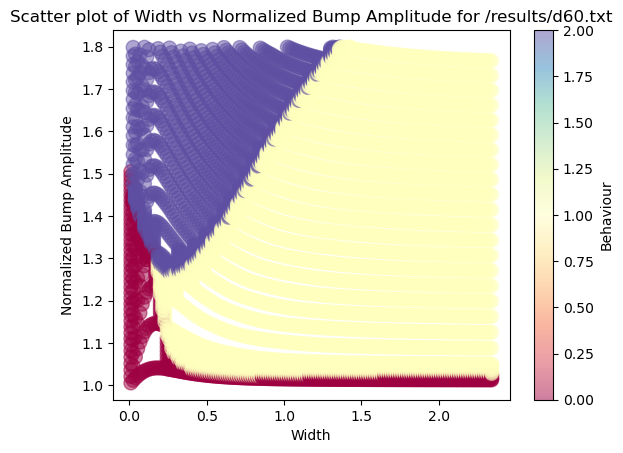

In [ ]:
plt.scatter(filtered_df['width'], filtered_df['normalized_bump_amplitude'], c=filtered_df['behaviour'], s=100, alpha=0.5, cmap='Spectral')
plt.colorbar(label='Behaviour')
plt.xlabel('Width')
plt.ylabel('Normalized Bump Amplitude')
plt.title(f'Scatter plot of Width vs Normalized Bump Amplitude for {file_name}')
plt.plot(0.391257, 1.294901, c='red')
plt.show()

In [172]:
deltas[0] 
numbers = [int(s) for s in deltas[0] if s.isdigit()]
number_str = ''.join(map(str, numbers))
print(number_str)

print(f"{number_str}{degree_symbol}")

60
60°


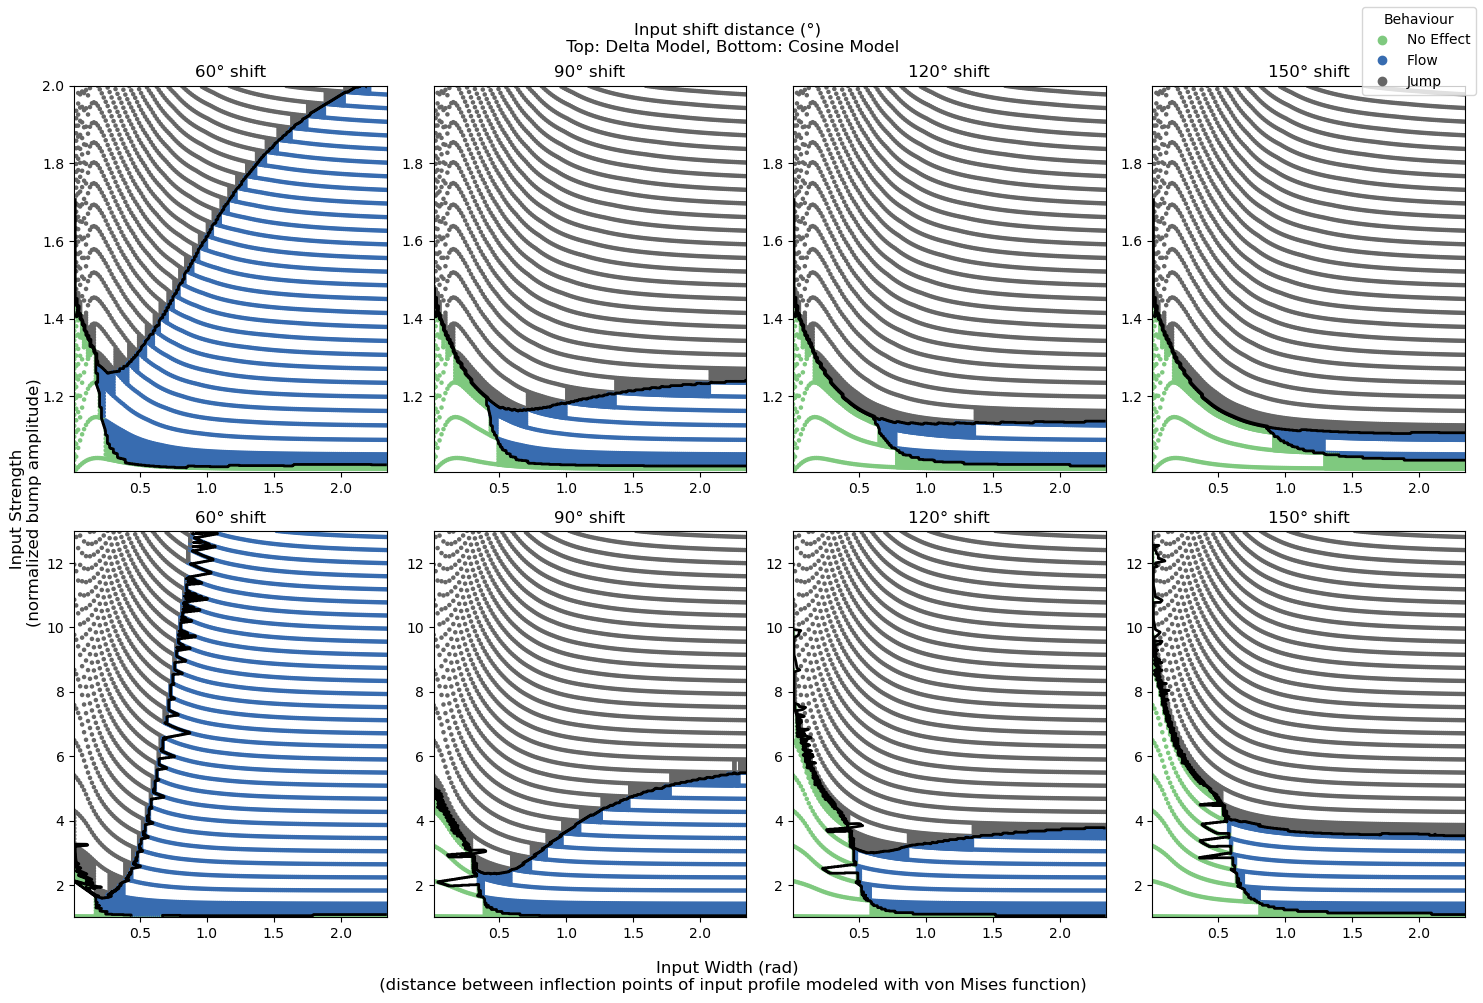

In [33]:
import os
deltas = ["d60.txt", "d90.txt", "d120.txt", "d150.txt"]
delta_threshold = 2
cosines = ["c60.txt", "c90.txt", "c120.txt", "c150.txt"]
cosine_threshold = 13

degree_symbol = u'\N{DEGREE SIGN}'

dir = os.path.join(os.getcwd(), "build/src/results/")



fig, axs = plt.subplots(2, 4, figsize=(15, 10))
for i, delta in enumerate(deltas):
    header = ['ampliini', 'ampliaft', 'width', 'behaviour','amp']  # from their code
    df = pd.read_csv(os.path.join(dir, delta), delimiter=' ', header=None, names=header)  # space separated
    df['normalized_bump_amplitude'] = df.iloc[:, 1] / df.iloc[:, 0]
    filtered_df = df[df['normalized_bump_amplitude'] <= delta_threshold]

    # mesh
    x = filtered_df['width'].to_numpy()
    y = filtered_df['normalized_bump_amplitude'].to_numpy()
    z = filtered_df['behaviour'].to_numpy()
    xi = np.linspace(x.min(), x.max(), 1000)
    yi = np.linspace(y.min(), y.max(), 1000)
    xi, yi = np.meshgrid(xi, yi)
    zi = griddata((x, y), z, (xi, yi), method='linear')

    ax = axs[0, i]
    scatter = ax.scatter(filtered_df['width'], filtered_df['normalized_bump_amplitude'], c=filtered_df['behaviour'], 
                         s=5, alpha=1, cmap='Accent')
    colours = ['black', 'black', 'black']
    contour = ax.contour(xi, yi, zi, levels=np.unique(z), colors=colours, linewidths=2)
    ax.set_title(f"{''.join(map(str, [int(s) for s in delta if s.isdigit()]))}{degree_symbol} shift")

# Create a legend for the scatter plot
handles, labels = scatter.legend_elements(prop="colors")
legend_labels = ['No Effect', 'Flow', 'Jump']
legend = fig.legend(handles, legend_labels, title="Behaviour", loc="upper right")

for i, cosine in enumerate(cosines):
    header = ['ampliini', 'ampliaft', 'width', 'behaviour', 'amp']  # from their code
    df = pd.read_csv(os.path.join(dir, cosine), delimiter=' ', header=None, names=header)  # space separated
    df['normalized_bump_amplitude'] = df.iloc[:, 1] / df.iloc[:, 0]
    filtered_df = df[df['normalized_bump_amplitude'] <= cosine_threshold]

    # mesh
    x = filtered_df['width'].to_numpy()
    y = filtered_df['normalized_bump_amplitude'].to_numpy()
    z = filtered_df['behaviour'].to_numpy()
    xi = np.linspace(x.min(), x.max(), 1000)
    yi = np.linspace(y.min(), y.max(), 1000)
    xi, yi = np.meshgrid(xi, yi)
    zi = griddata((x, y), z, (xi, yi), method='linear')

    ax = axs[1, i]
    scatter = ax.scatter(filtered_df['width'], filtered_df['normalized_bump_amplitude'], c=filtered_df['behaviour'], 
                         s=5, alpha=1, cmap='Accent')
    colours = ['black', 'black', 'black']
    contour = ax.contour(xi, yi, zi, levels=np.unique(z), colors=colours, linewidths=2)
    ax.set_title(f"{''.join(map(str, [int(s) for s in cosine if s.isdigit()]))}{degree_symbol} shift")

fig.supxlabel("Input Width (rad) \n (distance between inflection points of input profile modeled with von Mises function)")
fig.supylabel("           Input Strength \n(normalized bump amplitude)")
fig.suptitle(f"Input shift distance ({degree_symbol}) \n Top: Delta Model, Bottom: Cosine Model")


plt.tight_layout()
plt.savefig("fig4_recreate.png", dpi=200)
plt.show()




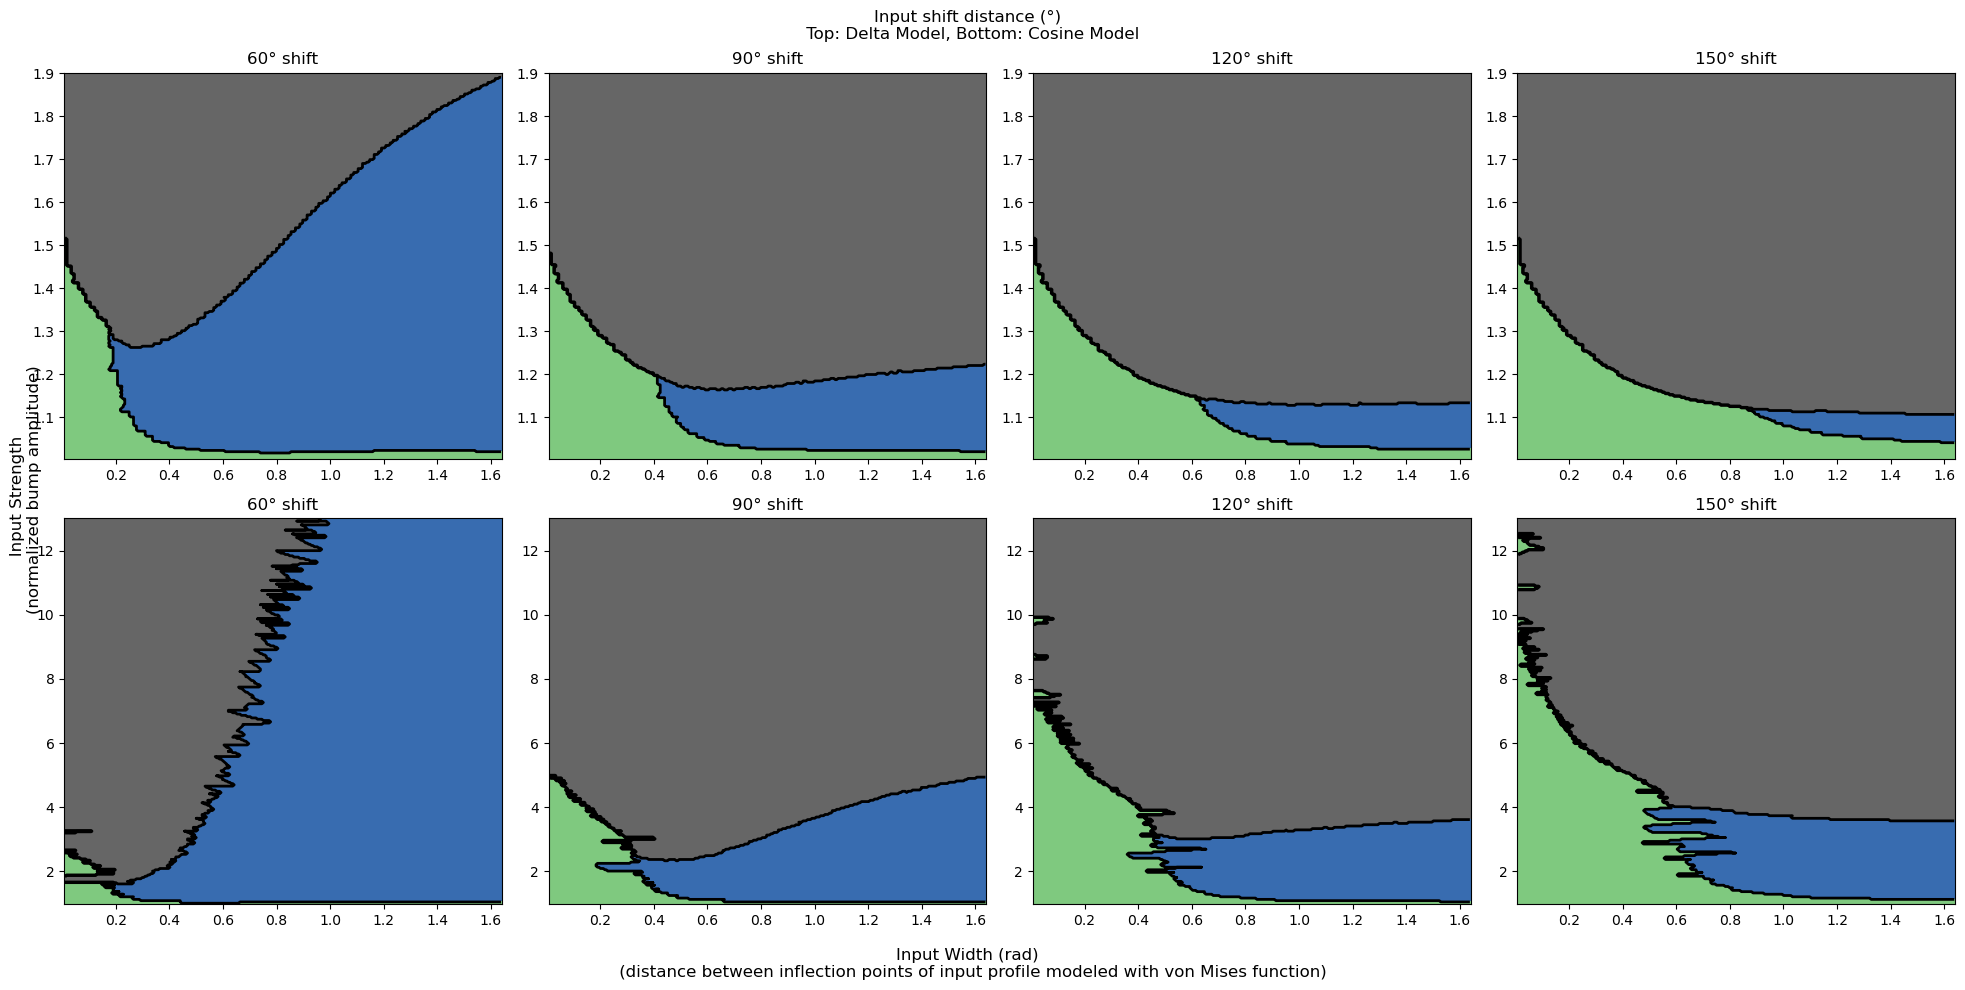

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import griddata
import os
deltas = ["d60.txt", "d90.txt", "d120.txt", "d150.txt"]
delta_threshold = 1.9
cosines = ["c60.txt", "c90.txt", "c120.txt", "c150.txt"]
cosine_threshold = 13
width_threshold = 1.65

degree_symbol = u'\N{DEGREE SIGN}'

dir = os.path.join(os.getcwd(), "build/src/results/")

fig, axs = plt.subplots(2, 4, figsize=(20, 10))

def create_phase_map_with_contours(x, y, z, ax, title, grid_size=300):
    """
    Create a phase map with flat coloring and black contour boundaries.
    
    Parameters:
    - x, y: Coordinates of the data points.
    - z: Phase values (behavior).
    - ax: Matplotlib axis to plot on.
    - title: Title for the subplot.
    - grid_size: Resolution of the interpolation grid.
    """
    # Grid for interpolation
    xi = np.linspace(x.min(), x.max(), grid_size)
    yi = np.linspace(y.min(), y.max(), grid_size)
    xi, yi = np.meshgrid(xi, yi)

    # Interpolate behavior values onto the grid
    zi = griddata((x, y), z, (xi, yi), method='nearest')  # Flat coloring

    # Plot the interpolated heatmap
    c = ax.pcolormesh(xi, yi, zi, shading='auto', cmap='Accent')

    # Add black contour lines to mark phase boundaries
    contours = ax.contour(xi, yi, zi, levels=np.unique(z), colors='black', linewidths=2)

    # Title and labels
    ax.set_title(title, fontsize=12)
    return c, contours

# Top Row: Delta Data
for i, delta in enumerate(deltas):
    header = ['ampliini', 'ampliaft', 'width', 'behaviour', 'amp']
    df = pd.read_csv(os.path.join(dir, delta), delimiter=' ', header=None, names=header)
    df['normalized_bump_amplitude'] = df['ampliaft'] / df['ampliini']
    filtered_df = df[(df['normalized_bump_amplitude'] <= delta_threshold) & (df['width'] <= width_threshold)]

    # Data
    x = filtered_df['width'].to_numpy()
    y = filtered_df['normalized_bump_amplitude'].to_numpy()
    z = filtered_df['behaviour'].to_numpy()

    # Create phase map with contours
    ax = axs[0, i]
    title = f"{''.join(map(str, [int(s) for s in delta if s.isdigit()]))}{degree_symbol} shift"
    c, contours = create_phase_map_with_contours(x, y, z, ax, title)
    ax.set_title(f"{''.join(map(str, [int(s) for s in delta if s.isdigit()]))}{degree_symbol} shift")

# Bottom Row: Cosine Data
for i, cosine in enumerate(cosines):
    header = ['ampliini', 'ampliaft', 'width', 'behaviour', 'amp']
    df = pd.read_csv(os.path.join(dir, cosine), delimiter=' ', header=None, names=header)
    df['normalized_bump_amplitude'] = df['ampliaft'] / df['ampliini']
    filtered_df = df[(df['normalized_bump_amplitude'] <= cosine_threshold) & (df['width'] <= width_threshold)]

    # Data
    x = filtered_df['width'].to_numpy()
    y = filtered_df['normalized_bump_amplitude'].to_numpy()
    z = filtered_df['behaviour'].to_numpy()

    # Create phase map with contours
    ax = axs[1, i]
    title = f"{''.join(map(str, [int(s) for s in cosine if s.isdigit()]))}{degree_symbol} cosine"
    c, contours = create_phase_map_with_contours(x, y, z, ax, title)
    ax.set_title(f"{''.join(map(str, [int(s) for s in cosine if s.isdigit()]))}{degree_symbol} shift")
    
fig.supxlabel("Input Width (rad) \n (distance between inflection points of input profile modeled with von Mises function)")
fig.supylabel("           Input Strength \n(normalized bump amplitude)")
fig.suptitle(f"Input shift distance ({degree_symbol}) \n Top: Delta Model, Bottom: Cosine Model")

plt.tight_layout()
plt.show()

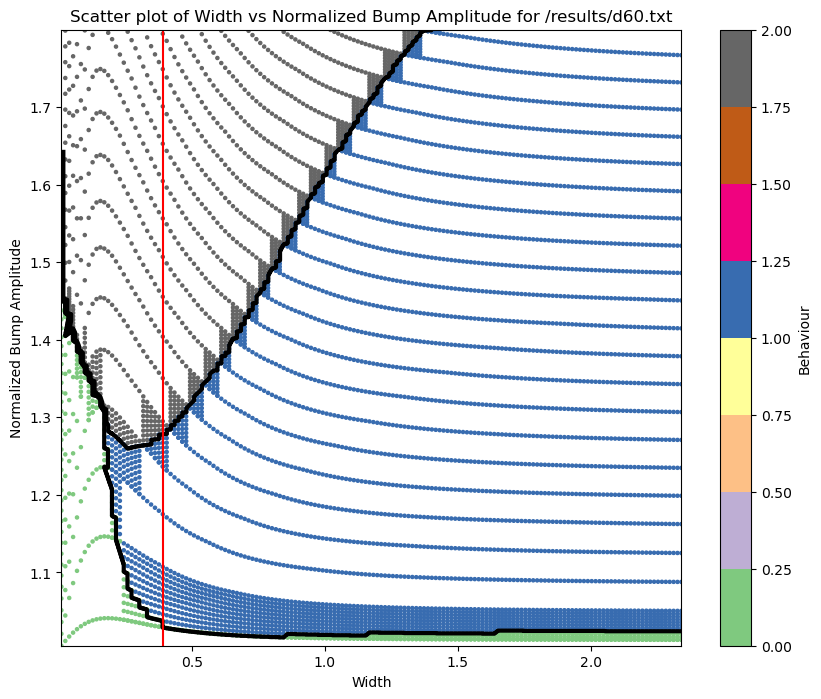

In [152]:
# Create a 2D histogram or grid for contour plotting
x = filtered_df['width'].to_numpy()
y = filtered_df['normalized_bump_amplitude'].to_numpy()
z = filtered_df['behaviour'].to_numpy()

#Interpolation grid
xi = np.linspace(x.min(), x.max(), 2000)
yi = np.linspace(y.min(), y.max(), 2000)
xi, yi = np.meshgrid(xi, yi)

# Interpolate
zi = griddata((x, y), z, (xi, yi), method='linear')

# Scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(filtered_df['width'], filtered_df['normalized_bump_amplitude'], c=filtered_df['behaviour'], 
                       s=5, alpha=1, cmap='Accent')
plt.colorbar(scatter, label='Behaviour')

# Add contour lines
colours = ['black', 'black', 'black']
contour = plt.contour(xi, yi, zi, levels=np.unique(z), colors=colours, linewidths=3)

# Labels and title
plt.xlabel('Width')
plt.ylabel('Normalized Bump Amplitude')
plt.title(f'Scatter plot of Width vs Normalized Bump Amplitude for {file_name}')
# Plot a point at the specified coordinates
plt.axvline(0.3926990817, c='red')
plt.show()

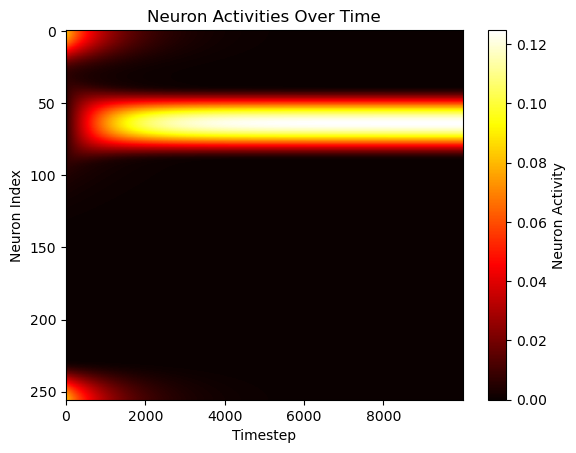

In [61]:
import numpy as np
import matplotlib.pyplot as plt

#NB! FOR CLI ITS AMPLITUDE THEN WIDTH
# Load neuron activity data
data = np.loadtxt("/Users/ciprianbangu/Cogmaster/S3/Theoretical Neuroscience/presentation/RingAttractor/ring_attractor/build/src/single_run_activity.dat")

# Plot neuron activity over time
plt.imshow(data.T, aspect="auto", cmap="hot")
plt.colorbar(label="Neuron Activity")
plt.xlabel("Timestep")
plt.ylabel("Neuron Index")
plt.title("Neuron Activities Over Time")
plt.show()

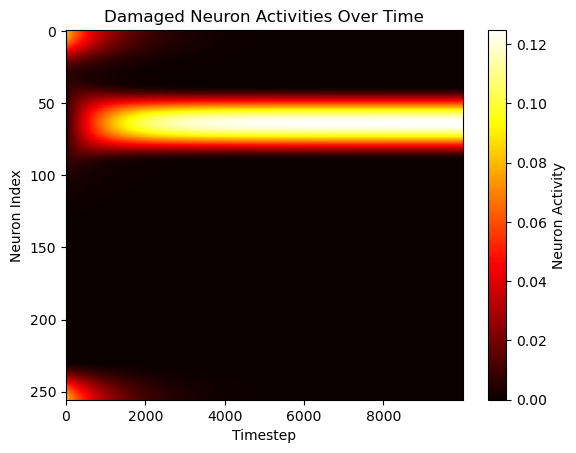

In [23]:
#NB! FOR CLI ITS AMPLITUDE THEN WIDTH
# Load neuron activity data
data2 = np.loadtxt("/Users/ciprianbangu/Cogmaster/S3/Theoretical Neuroscience/presentation/RingAttractor/ring_attractor/build/src/single_run_damage_activity.dat")

# Plot neuron activity over time
plt.imshow(data2.T, aspect="auto", cmap="hot")
plt.colorbar(label="Neuron Activity")
plt.xlabel("Timestep")
plt.ylabel("Neuron Index")
plt.title("Damaged Neuron Activities Over Time")
plt.show()

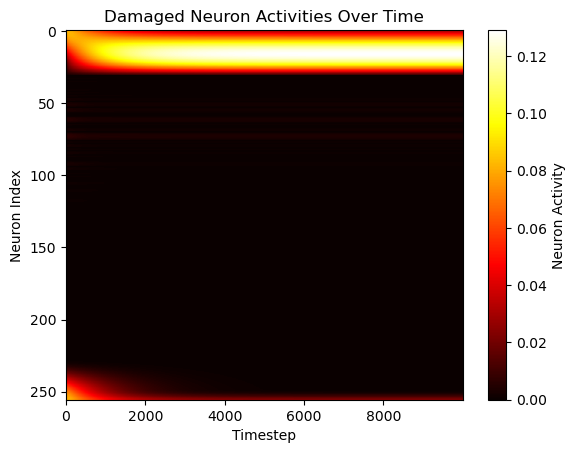

In [85]:
# Load neuron activity data
data3 = np.loadtxt("/Users/ciprianbangu/Cogmaster/S3/Theoretical Neuroscience/presentation/RingAttractor/ring_attractor/build/src/single_run_random_damage_activity.dat")

# Plot neuron activity over time
plt.imshow(data3.T, aspect="auto", cmap="hot")
plt.colorbar(label="Neuron Activity")
plt.xlabel("Timestep")
plt.ylabel("Neuron Index")
plt.title("Random Damaged Neuron Activities Over Time")
plt.show()

In [69]:
from matplotlib.animation import FFMpegWriter

metadata = dict(title='Movie', artist='Ciprian')
writer = FFMpegWriter(fps=500, metadata=metadata)
fig = plt.figure()
with writer.saving(fig, 'dead_neurons_90_85_64.mp4', 100):
    for i in range(5500):
        plt.plot(data2[i])
        writer.grab_frame()
        plt.clf()



<Figure size 640x480 with 0 Axes>

In [55]:
metadata = dict(title='Movie', artist='Ciprian')
writer = FFMpegWriter(fps=500, metadata=metadata)
fig = plt.figure()
with writer.saving(fig, 'normal_neurons_90_0.515750_2.3415.mp4', 100):
    for i in range(5500):
        plt.plot(data[i])
        writer.grab_frame()
        plt.clf()

<Figure size 640x480 with 0 Axes>

### TO DO:

try to do random damage trials - increase number of randomly damaged neurons and generate phase diagram

maximum activity index offset relative to normal - change localizaiton of damage and number of affected neurons; generate phase diagrams for same question. 



